  0%|          | 0/10 [00:00<?, ?it/s]

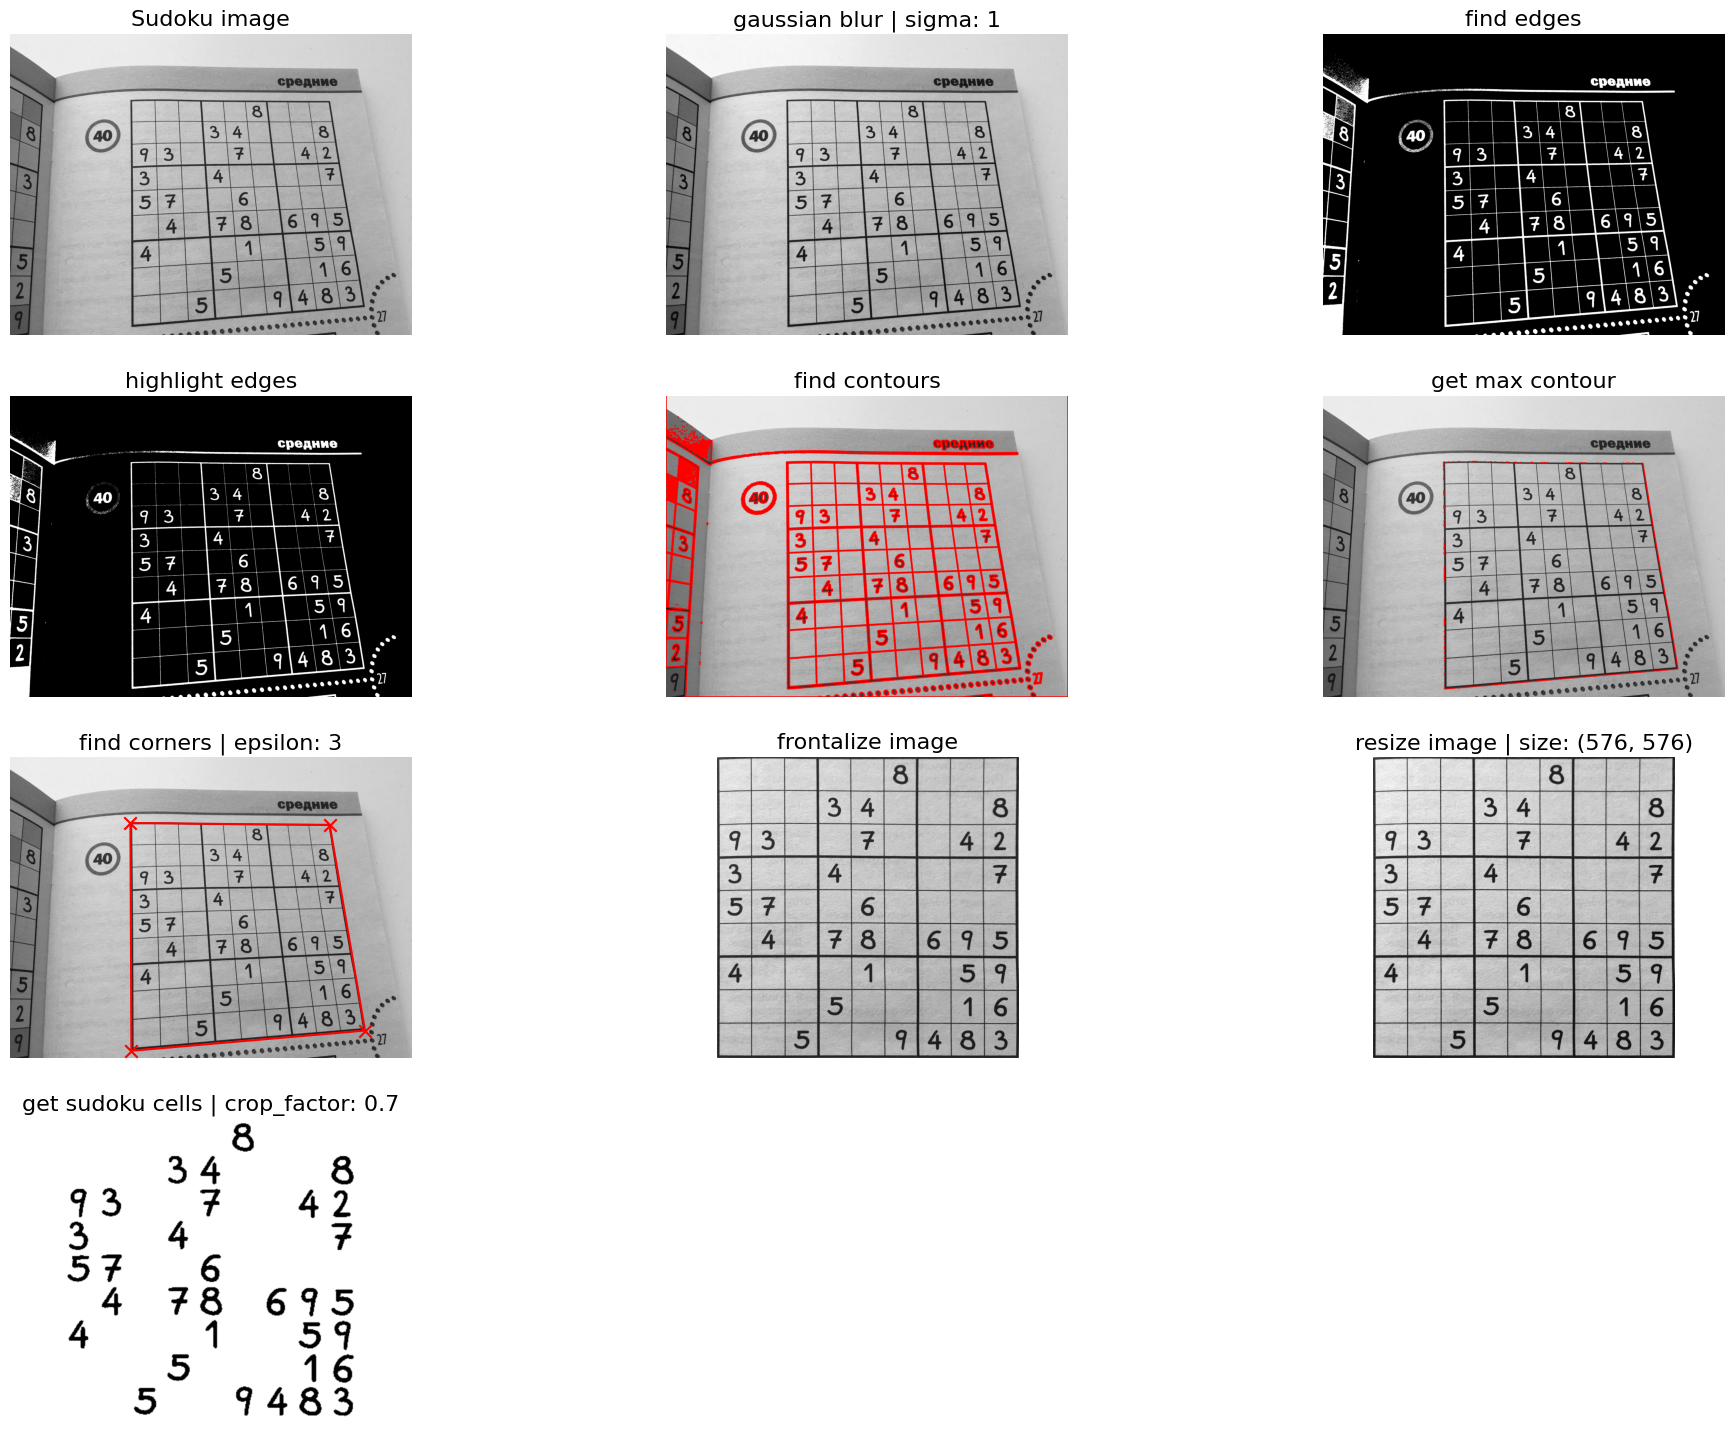

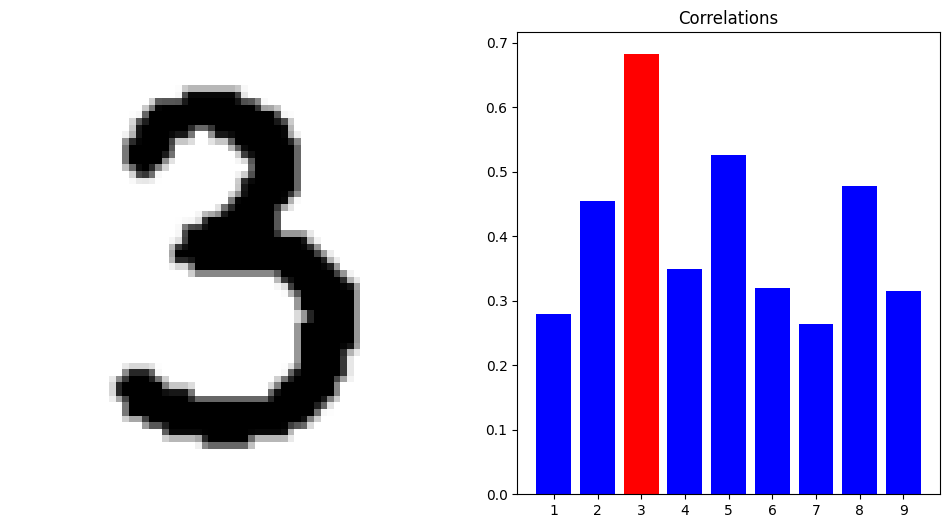

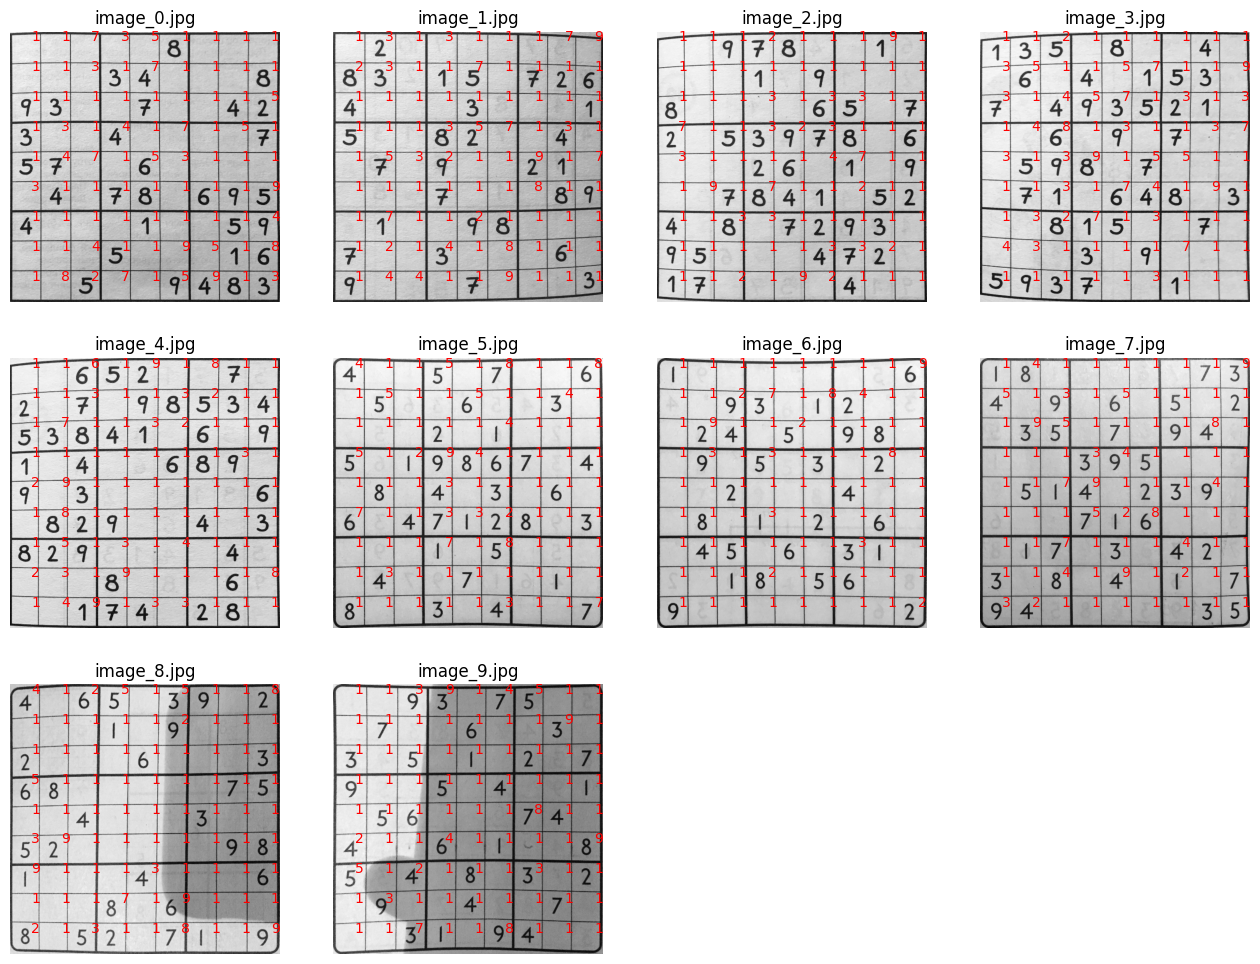

In [ ]:
import os

from const import TRAIN_IMAGES_PATH
from utils import read_image, show_image
from pipeline import Pipeline
from frontalization import find_edges, highlight_edges, find_contours, get_max_contour, find_corners, rescale_image, gaussian_blur, frontalize_image, show_frontalized_images

from const import SUDOKU_SIZE
from recognition import resize_image, get_sudoku_cells


from recognition import get_sudoku_cells

from utils import load_templates
from recognition import get_digit_correlations, show_correlations, recognize_digits, show_recognized_digits

from utils import load_templates
from recognition import get_digit_correlations, show_correlations

from sudoku_solver import matrix_to_puzzle, solve_sudoku
from recognition import show_solved_sudoku

from recognition import recognize_digits, show_recognized_digits

image_path = os.path.join(TRAIN_IMAGES_PATH, "image_0.jpg")
sudoku_image = read_image(image_path=image_path)


pipeline = Pipeline(functions=[gaussian_blur, find_edges, highlight_edges, find_contours, get_max_contour, find_corners, frontalize_image,
                            resize_image, get_sudoku_cells],
                parameters={"gaussian_blur": {"sigma": 1}, # play with the "sigma" parameter
                            "find_corners": {"epsilon": 3}, # play with the "epsilon" parameter
                            "resize_image": {"size": SUDOKU_SIZE},
                            # play with the "crop_factor" parameter and binarization_kwargs
                            "get_sudoku_cells": {"crop_factor":0.7, "binarization_kwargs": {}}
                            })
frontalized_image, sudoku_cells = pipeline(sudoku_image, plot=True, figsize=(24, 18))

templates_dict = load_templates()

sudoku_cell = sudoku_cells[2, 1]

correlations = get_digit_correlations(sudoku_cell, templates_dict)
show_correlations(sudoku_cell, correlations)

image_paths=[os.path.join(TRAIN_IMAGES_PATH, file_name) for file_name in sorted(os.listdir(TRAIN_IMAGES_PATH))
            if 'jpg' in os.path.splitext(file_name)[1]]

show_recognized_digits(image_paths=image_paths, pipeline=pipeline, figsize=(16, 12), digit_fontsize=10)

sudoku_matrix = recognize_digits(sudoku_cells, templates_dict)
image_paths=[os.path.join(TRAIN_IMAGES_PATH, file_name) for file_name in sorted(os.listdir(TRAIN_IMAGES_PATH))
             if 'jpg' in os.path.splitext(file_name)[1]]

show_recognized_digits(image_paths=image_paths, pipeline=pipeline, figsize=(16, 12), digit_fontsize=10)

print(matrix_to_puzzle(sudoku_matrix))
sudoku_matrix_solved = solve_sudoku(sudoku_matrix)
print(matrix_to_puzzle(sudoku_matrix_solved))